<a href="https://colab.research.google.com/github/castrostephano/TwitterSentiment/blob/main/TwitterSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
from textblob import TextBlob
import pandas as pd
from wordcloud import WordCloud
import matplotlib as plt
from matplotlib import figure
from matplotlib import *
import sys
from pylab import *

#I Chose Google Colab because of the ease of being able to start coding python and the cloud environment which allows you to work from any laptop
##I Found the google drive link to download the training and test data for Sentinment140, which is the 
#first dataset on the tweet datasets from the Certik Scraping through https://github.com/shaypal5/awesome-twitter-data


In [ ]:
#creating a dataframe based off the csv using pandas
tweets_df = pd.read_csv("testdata.csv")
#adding column names, based off the documentation, to clean up the dataframe 
tweets_df.columns = ["TweetPolarity", "TweetID", "Date", "Query", "User", "Text"]
tweets_df.head()

In [ ]:
#0=negative, 2=neutral, 4=positive
tweets_df.TweetPolarity.value_counts()
#mostly positive tweets in this dataset

4    181
0    177
2    139
Name: TweetPolarity, dtype: int64

In [ ]:
##negative polarity = negative comment, and vise versa
polarity_score = []

for i in range(0,tweets_df.shape[0]):
  #running the loop through the text processing library, TextBlob, which is an API for Natural language processing (NPL) tasks
  #[5] because that is where the text is in the csv, the 6th column
  score = TextBlob(tweets_df.iloc[i][5])
  #[0] because polarity is the first column(second column is subjectivity) 
  score1 = score.sentiment[0]
  polarity_score.append(score1)

  print(polarity_score)

In [ ]:
#adding polarity score to the dataframe
tweets_df = pd.concat([tweets_df, pd.Series(polarity_score)], axis = 1)

In [ ]:
#shows up as 0 as the column heading, looks messy
tweets_df.head()

In [ ]:
#change the heading to "Sentiment"
tweets_df.rename(columns = {tweets_df.columns[6]: "Sentiment"}, inplace = True)
tweets_df.head()

In [ ]:
#allowing for a 10% error margin
#checking to see how many positive comments there were
len(tweets_df[tweets_df.Sentiment>.1])

214

In [ ]:
#checking how many negative comments
len(tweets_df[tweets_df.Sentiment<0])

108

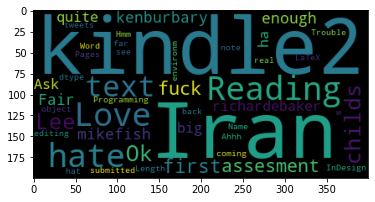

In [ ]:
#first visualization is only showing a word cloud of all of the tweets
cloud = WordCloud(max_words = 50).generate(str(tweets_df["Text"]))
plt.Figure( figsize =(10,10) )
plt.imshow(cloud)


In [ ]:
##creating a variable that only gives the positive Sentiment
#again allowing for a 10% margin of error

positive_tweets = tweets_df[tweets_df.Sentiment > .1]

In [ ]:
#creating a negative tweets dataframe
negative_tweets = tweets_df[tweets_df.Sentiment < .1]

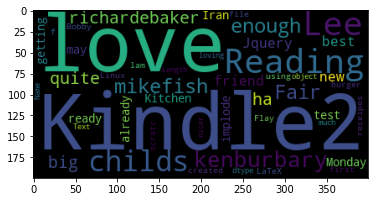

In [ ]:
#This figure is showing a wordcloud of positive tweets
cloud = WordCloud(max_words = 50).generate(str(positive_tweets["Text"]))
plt.Figure( figsize =(10,10) )
plt.imshow(cloud)

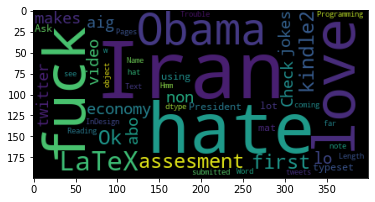

In [ ]:
#This figure is showing a wordcloud of negative tweets
cloud = WordCloud(max_words = 50).generate(str(negative_tweets["Text"]))
plt.Figure( figsize =(10,10) )
plt.imshow(cloud)


##These visualizations calculate popular keywords which visualizing it somewhere similar to Jupyter